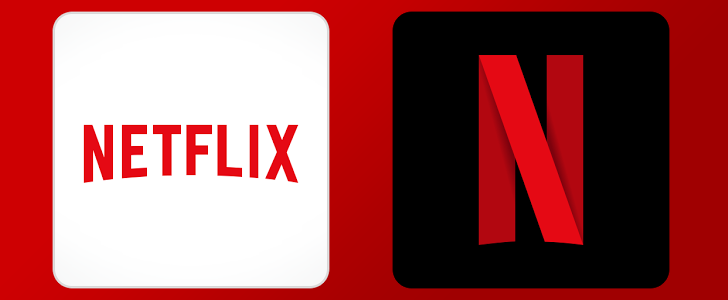

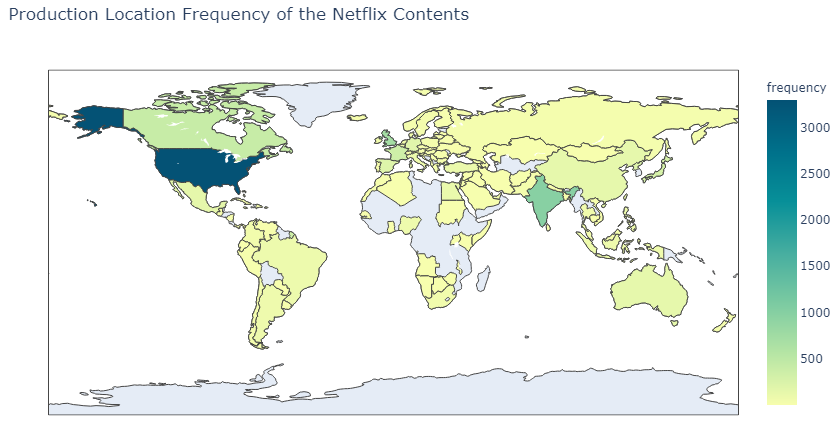

### This exploratory data analysis notebook will analyze the public available Netflix movies and TV shows content information. Please give it a like on top if you enjoy the read.

#### By the end of this analysis report, you will be able to answer the following questions:
1. What are the media content shares look like on Netflix platform?
2. How many director directed more than 1 movie and TV show (combined) and their works are included in Netflix? What are top 10 directors that directed the most number of movies or TV shows that are included in Netflix?
3. How many actors casted in more than 1 movie and TV show (combined) and their works are included in Netflix? What are top 20 popular actor in Netflix by the number of occurrence in Netflix contents?
4. Where were the movies / shows produced and how are they distributed spatially?
5. When are the contents first released on the market? When are the contents added into Netflix? Is there a huge difference (did Netflix add contents in the same year of release)?
6. What types of the content rating does Netflix have? What are the most common Netflix content rating and how do they distribute in the platform? Is Netflix kids friendly in terms of contents in general?
7. How long are the Netflix contents in general by content duration?
8. What are the most frequently appeared categories for viewers to watch on Netflix?

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 1. Read CSV Dataset with Pandas

In [ ]:
netflix_contents = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix_contents.head()

In [ ]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in the data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(netflix_contents)

In [ ]:
print(netflix_contents.shape)

#### Among 7787 entires, 30.68% of the Netflix contents in this dataset don't have director information. 9.22% of the cast information are missing. 6.51% of the entries don't have country of production info. And 0.09% of the data don't have rating values.

In [ ]:
print(len(netflix_contents.title.unique()))
netflix_contents.title.unique()

In [ ]:
print(len(netflix_contents.show_id.unique()))
netflix_contents.show_id.unique()

#### From the above outputs, we can observe that:
1. There are 12 columns and 7787 rows of data.  
2. Among the 12 columns, we only have 1 numeric column, which is the `release_year` column. The remaining columns are text columns, although we can apply some preprocessing to the `date_added` and the `duration` column.
3. We can drop the `show_id` column since it has 7787 unique incremented labels for the primary id of the contents, which is not relevant to analysis.

In [ ]:
# let's drop the 1st column called 'show_id'
netflix_contents = netflix_contents[netflix_contents.columns[1:]]
print(netflix_contents.shape)
netflix_contents.head()

## 2. Analyze the dataset with calculations and visualizations
#### Let's answer exploratory questions with visualizations.

### 1. What's the market share of different media contents on Netflix?  

In [ ]:
px.histogram(netflix_contents, 
             x="type", color="type", 
             title="Netflix Content Total by Media Type")

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['TV Show', 'Movie'], values=[2410, 5377], hole=.3)])
fig.update_layout(title="Netflix Market Content Percentage by Type")
fig.show()

#### From the above visualization, we can observe that 69.1% of the Netflix contents are Movies with a total number of 5377 and 30.9% of the Netflix contents are TV Shows with a total number of 2410. 

### 2. How many director directed more than 1 movie and TV show (combined) and their works are included in Netflix? What are top 10 directors that directed the most number of movies or TV shows that are included in Netflix?

In [ ]:
print("Number of unique directors on Netflix:", 
      len(netflix_contents.director.unique()))
print("Number of directors that directed more than 1 media content:", 
      sum(netflix_contents.director.value_counts() > 1))
print("Average of media content count by director:", 
      round(netflix_contents.director.value_counts().mean(),2))
print("Median of media content count by director:", 
      round(netflix_contents.director.value_counts().median(),2))
print("Percentage of directors on Netflix directed more than 1 media content:", 
      round(100*737/4050, 2), "%")

#### There are 737 directors have more than 1 media content on Netflix.  
#### The average content count by director is 1.33 and the median of content count by director is 1. 
#### These number implies that the majority of director has only 1 content on Netflix.
#### That's 18.2% of the total number of directors in Netflix with a population of 4050.

In [ ]:
# what are the top 10 directors by total number of media contents on Netflix
netflix_contents.director.value_counts()[:10]

In [ ]:
netflix_contents.query("director == 'Raúl Campos, Jan Suter'")

#### From the above summary of the top 10 directory with the most number of contents published on Netflix, we can see that the director group of "Raúl Campos, Jan Suter" has the most of the content published on Netflix with content type of Movie and listed as "Stand-Up Comedy" category in Latin American countries mostly in the recent years from 2016 to 2018.

### 3. How many actors casted in more than 1 movie and TV show (combined) and their works are included in Netflix? What are top 20 popular actor in Netflix by the number of occurrence in Netflix contents?

#### As you can see the actor column is not just a single entry, we need to apply some data processing and calculations.
#### I will split each entry of the `cast` column by comma and strip the empty strings first. Then, I will use a dictionary to store the number of cast appearances for viusalization.

In [ ]:
from collections import Counter 

In [ ]:
# counter is lovely here to count the string appearance
actor_frequency = Counter(', '.join(netflix_contents.cast.dropna()).split(', '))
print("Top 20 most frequently appeared actors globally in Netflix:")
actor_frequency.most_common(20)

In [ ]:
print("Number of unique actors on Netflix:", len(actor_frequency.values()))
print("Average actors appearance on Netflix:", round(np.array(list(actor_frequency.values())).mean(),2))
print("Median actors appearance on Netflix:", round(np.median(np.array(list(actor_frequency.values()))),2))
print("Number of actors appeared in more than 1 Netflix content:", sum(np.array(list(actor_frequency.values())) > 1))

#### From the above summary statistics, we can observe that most of the actors only appearred once in all the Netflix content. There 9545 out of 32881 actors appeared more than once.

### 4. Where were the movies / shows produced and what about their distributions?

In [ ]:
print("Number of unique country values:", len(netflix_contents.country.unique()))

In [ ]:
# find movies that are produced in multiple countries
count = 0
for country in netflix_contents.country.dropna().unique():
     if ', ' in country:
        count += 1
print("Number of unique country column value includes multiple countries:", count)

#### From above value counts by country, we can see that 609 out of the 682 unique `country` column values includes the `', '` string, which implies that many of the unique `country` values includes more than 1 country. We will need to apply preprocessing to the `country` column. 

In [ ]:
# summary statistics for country column
count = 0
for country in netflix_contents.country.dropna():
     if ', ' in country:
        count += 1
content_total = len(netflix_contents.country.dropna())
print("Number of movie/show in Netflix with production location listed:", content_total)
print("Number of movie/show produced in multiple countries:", count)
print("Percentage of movie/show produced in multiple countries:", round(100 * count/content_total, 2), "%")

In [ ]:
# obtain the content production location count
country_dict = {}
counter = 0
for country in netflix_contents.country.dropna():
    country_split = country.split(", ")
    for splited_country in country_split:
        if splited_country not in country_dict:
            country_dict[splited_country] = 1
        else:
            country_dict[splited_country] += 1
country_dict

In [ ]:
# get sorted lists of country frequency and country names by country frequency
country_frequencies, country_names = zip(*sorted(zip(country_dict.values(), 
                                                     country_dict.keys()), 
                                                 reverse = True))
country_frequency_df = pd.DataFrame({"country": country_names, 
                                     "frequency": country_frequencies})
country_frequency_df["percentage"] = country_frequency_df["frequency"] / country_frequency_df["frequency"].sum() * 100
country_frequency_df["percentage"] = round(country_frequency_df["percentage"], 3)
country_frequency_df

In [ ]:
# visualizations
production_location = px.bar(country_frequency_df, 
       x='country', y='frequency',
       title="Netflix Content Production Location Distribution")
production_location.show()

production_location_top20 = px.bar(country_frequency_df.head(20), 
       x='country', y='frequency',
       text="frequency",
       title="Top 20 Netflix Content Production Location Distribution")
production_location_top20.show()

px.bar(country_frequency_df.head(20), 
       x='country', y='percentage',
       text="percentage",
       title="Top 20 Netflix Content Production Location Percentage Distribution")

#### Among the Netflix contents, 3296 contents are produced in the United States. We can see that United States production has the 36.368% of movie or TV show contents market share on Netflix followed by India (10.924%) and United Kingdom (7.966%).

#### Let's combine geographic mapping dataset with our Netflix dataset to see the data visualization on map.

In [ ]:
country_geoinfo = pd.read_csv("/kaggle/input/country-mapping-iso-continent-region/continents2.csv")
country_geoinfo = country_geoinfo.rename({'name': 'country'}, axis='columns')
country_geoinfo = country_geoinfo[["country", "alpha-3", "region", "sub-region"]]
country_geoinfo.head()

In [ ]:
production_location_df = pd.merge(country_frequency_df, 
                                  country_geoinfo[country_geoinfo.country.isin(country_names)], 
                                  how='left', on=["country"])
production_location_df.head()

In [ ]:
fig = px.choropleth(production_location_df, locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    title="Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

#### The above choropleth map makes it easy to see that the US, Canada, India, UK, France, and Spain have darker color on the map. This imples that there are relative more movie or TV shows are produced in those countries.

In [ ]:
fig = px.choropleth(production_location_df.query("region == 'Asia'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="asia",
                    title="Asia: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

#### After zooming into the Asia and hovering the visualization with your mouse, you can see 990 Netflix contents produced in India with the darkest color on the map followed by Japan (287), South Korea (212), China (147), and Turkey (108) with relative darker regions.

In [ ]:
# top 10 content production locations in Asia
production_location_df.query("region == 'Asia'").sort_values("frequency", ascending=False)[:10]

In [ ]:
fig = px.choropleth(production_location_df.query("region == 'Europe'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="europe",
                    title="Europe: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

#### After zooming into the Europe and hovering the visualization with your mouse, you can see 722 Netflix contents produced in the UK with the darkest color on the map followed by France (349), Spain (215), Germany (199), and Italy (90) with relative darker regions.

In [ ]:
# top 10 content production locations in Europe
production_location_df.query("region == 'Europe'").sort_values("frequency", ascending=False)[:10]

In [ ]:
fig = px.choropleth(production_location_df.query("region == 'Africa'"), locations="alpha-3",
                    color="frequency",
                    hover_name="country",
                    scope="africa",
                    title="Africa: Production Location Frequency of the Netflix Contents",
                    color_continuous_scale=px.colors.sequential.Bluyl)
fig.show()

#### After zooming into the Afriaca and hovering the visualization with your mouse, you can see 110 Netflix contents produced in the Egypt with the darkest color on the map followed by Nigeria (76), South Africa (54), Germany (199), and Morocco (6) with relative darker regions.

In [ ]:
# top 10 content production locations in Africa
production_location_df.query("region == 'Africa'").sort_values("frequency", ascending=False)[:10]

#### Let's also visualize the data by region and sub-region. 

In [ ]:
# group by location data by region
location_by_region = production_location_df.groupby("region", as_index=False).sum().sort_values("frequency", ascending=False)
px.bar(location_by_region.head(20), 
       x='region', y='frequency',
       text="frequency",
       title="Production location distribution by region")

#### If we group the locations by region, we can observe that Americas region has the most number of contents produced and listed in Netflix with over 4000 contents.

In [ ]:
# group by location data by subregion
location_by_subregion = production_location_df.groupby("sub-region", as_index=False).sum().sort_values("frequency", ascending=False)
px.bar(location_by_subregion.head(20), 
       x='sub-region', y='frequency',
       text="frequency",
       title="Production location distribution by subregion")

#### If we group the locations by sub-region, we can observe that North America has the most number of contents (3709) produced and listed in Netflix followed by West Europe and South Asia (1025) and North Europe (896).

### 5. When are the contents first released? When are the contents added into Netflix? Is there a huge difference (did Netflix add contents in the same year of release)?

In [ ]:
# use all the available data for date_added
netflix_date_available_df = netflix_contents[pd.notnull(netflix_contents['date_added'])]
netflix_date_available_df.head()

In [ ]:
print("Movies / TV shows release years:")
netflix_date_available_df["release_year"].unique()

In [ ]:
print("When did Netflix add the contents:")
year_split = netflix_date_available_df["date_added"].str.split(", ", expand = True)[[1]]
year_split.columns = ["year_added"]
year_split["year_added"].unique()

In [ ]:
# extract year added from date_added
netflix_date_available_df = pd.concat([netflix_date_available_df, year_split], axis=1)
netflix_date_available_df["year_added"] = netflix_date_available_df["year_added"].astype(int)
netflix_date_available_df.head()

In [ ]:
release_year_dist = px.histogram(netflix_date_available_df, 
             x="release_year", color="type",
             title="Release Year Distribution of the Netflix Contents")
release_year_dist.show()
year_added_dist = px.histogram(netflix_date_available_df, 
             x="year_added", color="type",
             title="Added Year Distribution of the Netflix Contents")
year_added_dist.show()

#### From the above histogram, we can observe that the most of the Netflix media contents are released in 2018 for the available contents uploaded in Netflix and most of the contentes are added from 2015 to 2020 in Netflix. The growth of movie contents is faster with a steeper slope.

In [ ]:
# calculate the most commonly added contents' release year
netflix_date_available_df[["year_added", "release_year"]]\
    .groupby("year_added", as_index=False) \
    .agg(lambda x:x.value_counts().index[0])

#### From the above summary, we can see that most of the content release years are the same as the year when Netflix added the contents except the following:
1. In the 2008, the highest number of newly included Netflix contents are from the year of 2006.
1. In the 2010, the highest number of newly included Netflix contents are from the year of 1987.
1. In the 2011, the highest number of newly included Netflix contents are from the year of 1988.

In [ ]:
# calculate the number of unique release year groupby the year added
release_year_variety = netflix_date_available_df[["year_added", "release_year"]]\
    .groupby("year_added", as_index=False) \
    .agg(lambda x:len(x.unique()))
release_year_variety.columns = ["year_added", "total_unique_release_year"]
release_year_variety.sort_values("total_unique_release_year", ascending=False)

In [ ]:
# unique content release year of new contents added in 2019
netflix_date_available_df.query("year_added == 2019")["release_year"].unique()

#### In 2019, there are movies from 59 different unique years are added into Netflix. In terms of the variety of content release years, in the recent years, Netflix added movies from different release years comparing to 2010-2015.

### 6. What types of the rating does Netflix have? What are the most common Netflix content rating and how do they distribute in the platform?

In [ ]:
print("Number of unique Netflix content ratings:", len(netflix_contents.rating.unique()))

In [ ]:
# calculate summary statistics for rating
rating_frequency = pd.DataFrame(netflix_contents.rating.value_counts())
rating_frequency.reset_index(drop=False, inplace=True)
rating_frequency["percentage"] = 100 * rating_frequency["rating"] / sum(rating_frequency["rating"])
rating_frequency.columns = ["rating", "total", "percentage"]
rating_frequency

In [ ]:
px.bar(rating_frequency, 
       x='rating', y='total',
       text="total",
       title="Netflix Movie/Show Rating Distribution")

In [ ]:
sum(rating_frequency["percentage"].values[:5])

#### The top 5 ratings are actually not kid friendly at all including sexual and graphic violence and coarse languages; the top 5 rating categories take over 85.49% of the entire Netflix contents.

### TV Ratings:
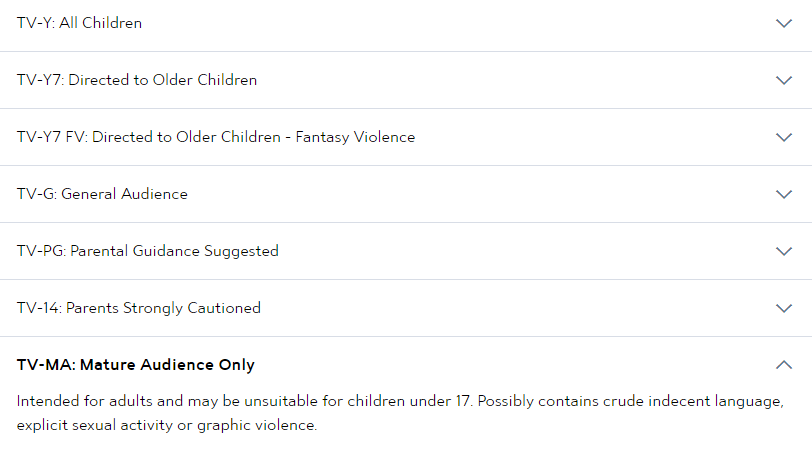

### Movie Ratings:
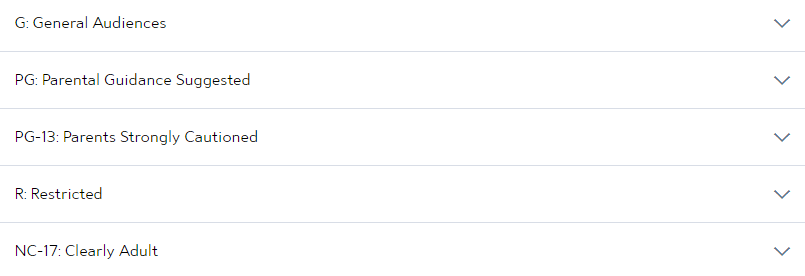
Rating source: https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions/

### 7. What are the durations of the Netflix contents and how are they distributed?

In [ ]:
netflix_contents.duration.unique()

#### Since there are two groups of contents using different units, I will process them separately.

In [ ]:
sum(netflix_contents.duration.apply(lambda row: "Season" in row))

#### 2410 of the Netflix contents use "season" as the measurement for duration.

In [ ]:
sum(netflix_contents.duration.apply(lambda row: "min" in row))

#### 5377 of the Netflix contents use "season" as the measurement for duration.
#### Let's analyze their distribution separately since the units are different.

In [ ]:
duration_by_season = pd.DataFrame(netflix_contents.duration[netflix_contents.duration.apply(lambda row: "Season" in row)]\
    .apply(lambda row: row.split(" ")[0])).astype(int)
duration_by_season.describe()

In [ ]:
px.histogram(duration_by_season, 
             x="duration",
             title="Duration Distribution of the Netflix Contents by Season")

In [ ]:
# calculate summary statistics for duration by season
season_duration_frequency = pd.DataFrame(duration_by_season.duration.value_counts())
season_duration_frequency.reset_index(drop=False, inplace=True)
season_duration_frequency["percentage"] = 100 * season_duration_frequency["duration"] \
                                          / sum(season_duration_frequency["duration"])
season_duration_frequency.columns = ["season", "count", "percentage"]
season_duration_frequency

#### 1608 shows have only 1 season and that's 66.72% of the shows in Netflix. 382 of the shows have 2 seasons in Netflix with percentage of 15.85%. The majority of the shows have less than 3 seasons in Netflix.

In [ ]:
duration_by_min= pd.DataFrame(netflix_contents.duration[netflix_contents.duration.apply(lambda row: "min" in row)]\
    .apply(lambda row: row.split(" ")[0])).astype(int)
duration_by_min.describe()

In [ ]:
px.histogram(duration_by_min, 
             x="duration",
             title="Duration Distribution of the Netflix Contents by Minutes")

#### For the contents using min as their duration measurement, the median duration is 98 minutes and the mean duration is 99 minutes. The above histogram centered around 100 for this group of  Netflix contents.

### 8. What are the most mentioned categories for viewers to watch on Netflix?

In [ ]:
# obtain the content category count
category_dict = {}
counter = 0
for category in netflix_contents.listed_in.dropna():
    category_split = category.split(", ")
    for splited_category in category_split:
        if splited_category not in category_dict:
            category_dict[splited_category] = 1
        else:
            category_dict[splited_category] += 1
category_dict

In [ ]:
# get sorted lists of category frequency and category names by category frequency
category_frequencies, category_names = zip(*sorted(zip(category_dict.values(), 
                                                     category_dict.keys()), 
                                                 reverse = True))
category_frequency_df = pd.DataFrame({"category": category_names, 
                                     "frequency": category_frequencies})
category_frequency_df["percentage"] = category_frequency_df["frequency"] / category_frequency_df["frequency"].sum() * 100
category_frequency_df["percentage"] = round(category_frequency_df["percentage"], 3)
category_frequency_df

#### "International Movies" is the most frequently mentioned category followed by "Dramas" and "Comedies". Since the categories mix with TV Shows and Movies. I will apply the same calculation but do it separately for TV Shows and Movies to see what are the common category by content type in Netflix.

In [ ]:
# obtain the content category count
category_dict = {}
counter = 0
for category in netflix_contents.query("type == 'TV Show'").listed_in.dropna():
    category_split = category.split(", ")
    for splited_category in category_split:
        if splited_category not in category_dict:
            category_dict[splited_category] = 1
        else:
            category_dict[splited_category] += 1
            
# get sorted lists of category frequency and category names by category frequency
category_frequencies, category_names = zip(*sorted(zip(category_dict.values(), 
                                                     category_dict.keys()), 
                                                 reverse = True))
category_frequency_df = pd.DataFrame({"category": category_names, 
                                     "frequency": category_frequencies})
category_frequency_df["percentage"] = category_frequency_df["frequency"] / category_frequency_df["frequency"].sum() * 100
category_frequency_df["percentage"] = round(category_frequency_df["percentage"], 3)
category_frequency_df

#### For TV shows, the top 5 frequently mentioned categories are "International TV Shows" (1199), "TV Dramas" (704), "TV Comedies" (525), "Crime TV Shows" (427), and "Kids' TV" (414).

In [ ]:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800).generate_from_frequencies(category_dict)
plt.figure( figsize=(10,10) );
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
# obtain the content category count
category_dict = {}
counter = 0
for category in netflix_contents.query("type == 'Movie'").listed_in.dropna():
    category_split = category.split(", ")
    for splited_category in category_split:
        if splited_category not in category_dict:
            category_dict[splited_category] = 1
        else:
            category_dict[splited_category] += 1
            
# get sorted lists of category frequency and category names by category frequency
category_frequencies, category_names = zip(*sorted(zip(category_dict.values(), 
                                                     category_dict.keys()), 
                                                 reverse = True))
category_frequency_df = pd.DataFrame({"category": category_names, 
                                     "frequency": category_frequencies})
category_frequency_df["percentage"] = category_frequency_df["frequency"] / category_frequency_df["frequency"].sum() * 100
category_frequency_df["percentage"] = round(category_frequency_df["percentage"], 3)
category_frequency_df

#### For movies, the top 5 frequently mentioned categories are "International Movies" (2437), "Dramas" (2106), "Comedies" (1471), "Documentaries" (786), and "Action & Adventure" (721).

In [ ]:
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800).generate_from_frequencies(category_dict)
plt.figure( figsize=(10,10) );
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

### Thank you for reading all the way to here!
### Please give me an upvote if you enjoy reading the visualizations with analysis.